<a href="https://colab.research.google.com/github/AjayB08/Neural_Networks/blob/main/NN_Optimizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Business Case**

You are working at grocery store chain, which has different stores buying various products. Based on the purchase history :
*   you want to divide the stores into classes for better inventory management and customer handling.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load data
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2

Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 27.7MB/s]


**Data Description:**


| Id | Features | Description |
| :-- | :--| :--|
|01| **Region** | Region of the store (1: Less purchase 2: frequent purchase 3: high purchase|
|02| **Fresh** | How many fresh items are brought |
|03|**Milk**| How many units of Milk is purchased |
|04|**Grocery**|Units of Grocery bought for the store |
|05|**Frozen**|Frozen items purchased |
|06|**Detergents_Paper**|Unit of Detergents and paper bought |
|07|**Delicassen**|Food related items |
|08|**class**| Type/Category of the Store (1 ,2 , 3)|

In [5]:
df = pd.read_csv("multiclass.csv")
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


In [6]:
df.shape

(440, 8)

Total Number of samples and features of the data:
<center>

| Records | Features |
| :-- | :-- |
| 440 | 8 |

##EDA

In [7]:
df.isna().sum(axis=0)

Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
class               0
dtype: int64

No null value present for any feature.

In [8]:
df.nunique()

Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
class                 3
dtype: int64

Region and class column has only 3 unique value. So, we can easily convert them to one hot coding

Converting `Region`and `Class`, a categorical data into `one hot coding` matrix

In [9]:
Y = df["class"]
df = pd.get_dummies(df, columns=["Region", "class"])
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3,class_1,class_2,class_3
0,12669,9656,7561,214,2674,1338,0,0,1,0,1,0
1,7057,9810,9568,1762,3293,1776,0,0,1,0,1,0
2,6353,8808,7684,2405,3516,7844,0,0,1,0,1,0
3,13265,1196,4221,6404,507,1788,0,0,1,1,0,0
4,22615,5410,7198,3915,1777,5185,0,0,1,1,0,0


In [10]:
x = df.drop(columns=["class_1", "class_2", "class_3"])
y = df[["class_1", "class_2", "class_3"]]

##Visualizing data using PCA

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [12]:
v1 = pca.fit_transform(x)
v1.shape

(440, 2)

[0.45961362 0.40517227]


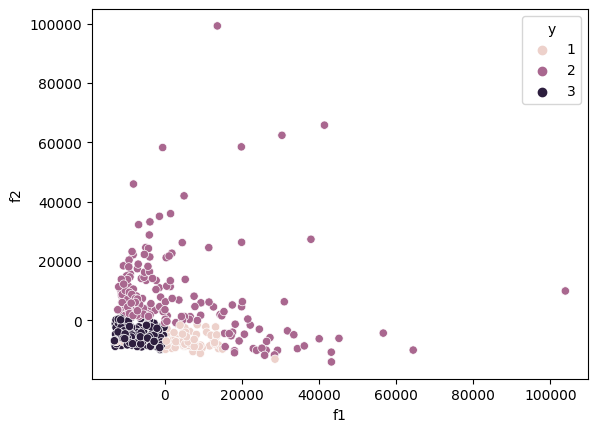

In [13]:
df2 = pd.DataFrame(v1, columns=["f1", "f2"])
df2['y'] = Y
print(pca.explained_variance_ratio_)
sns.scatterplot(data=df2, x='f1', y='f2', hue='y')
plt.show()

**Observation** :
Data is non-linear, hence to correctly classify the data we will require a deep neural network

In [16]:
#Split train, test, val data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
print("Train : ", X_train.shape, y_train.shape)
print("Test : ", X_test.shape, y_test.shape)
print("Validation : ", X_val.shape, y_val.shape)

Train :  (356, 9) (356, 3)
Test :  (44, 9) (44, 3)
Validation :  (40, 9) (40, 3)


In [17]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

Let's create a NN model using [tensorflow keras](https://keras.io/api/) of 7 layers such that

|Layer| |Description|
|:-| |:-|
|**L1**| |Is the Input Layer |
|**L2**| |Contains 32 Neurons|
|**L3**| |Contains 64 Neurons|
|**L4**| |Contains 128 Neurons|
|**L5**| |Contains 64 Neurons |
|**L6**| |Contains 32 Neurons|
|**L7**| |Is the Output Layer |
<br><br>

We will use reLU as activation function between layers

In [21]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(42)
tf.random.set_seed(42)

In [38]:
def create_baseline():
  model = Sequential([
      Dense(32, activation='relu', kernel_initializer='glorot_uniform'),
      Dense(64, activation='relu', kernel_initializer='glorot_uniform'),
      Dense(128, activation='relu', kernel_initializer='glorot_uniform'),
      Dense(64, activation='relu', kernel_initializer='glorot_uniform'),
      Dense(32, activation='relu', kernel_initializer='glorot_uniform'),
      Dense(3, activation='softmax')
  ])
  return model

In [39]:
model = create_baseline()

Using MiniBatch GD as Optimizer

In [40]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.CategoricalCrossentropy())

Training the model with `batch_size` of 128 and `epoch` of 10

In [41]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=128)

Epoch 1/10
3/3 [==============================] - 2s 139ms/step - loss: 1.0847 - val_loss: 1.0810
Epoch 2/10
3/3 [==============================] - 0s 20ms/step - loss: 1.0795 - val_loss: 1.0757
Epoch 3/10
3/3 [==============================] - 0s 20ms/step - loss: 1.0743 - val_loss: 1.0702
Epoch 4/10
3/3 [==============================] - 0s 21ms/step - loss: 1.0692 - val_loss: 1.0648
Epoch 5/10
3/3 [==============================] - 0s 19ms/step - loss: 1.0643 - val_loss: 1.0596
Epoch 6/10
3/3 [==============================] - 0s 21ms/step - loss: 1.0595 - val_loss: 1.0546
Epoch 7/10
3/3 [==============================] - 0s 20ms/step - loss: 1.0549 - val_loss: 1.0495
Epoch 8/10
3/3 [==============================] - 0s 28ms/step - loss: 1.0505 - val_loss: 1.0446
Epoch 9/10
3/3 [==============================] - 0s 20ms/step - loss: 1.0461 - val_loss: 1.0398
Epoch 10/10
3/3 [==============================] - 0s 20ms/step - loss: 1.0418 - val_loss: 1.0349


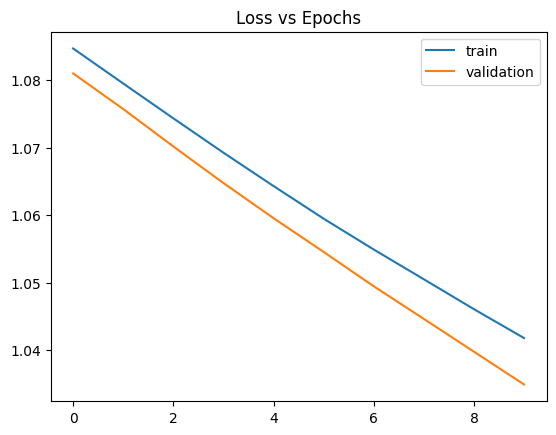

In [45]:
epochs = history.epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss vs Epochs")

plt.show()

After 10 epochs model still has very high loss.<br>
Let's increase epochs to 200 for better model perfomance

In [47]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=128)

Epoch 1/200
3/3 [==============================] - 0s 46ms/step - loss: 1.0376 - val_loss: 1.0301
Epoch 2/200
3/3 [==============================] - 0s 32ms/step - loss: 1.0335 - val_loss: 1.0256
Epoch 3/200
3/3 [==============================] - 0s 37ms/step - loss: 1.0294 - val_loss: 1.0210
Epoch 4/200
3/3 [==============================] - 0s 53ms/step - loss: 1.0252 - val_loss: 1.0164
Epoch 5/200
3/3 [==============================] - 0s 46ms/step - loss: 1.0212 - val_loss: 1.0119
Epoch 6/200
3/3 [==============================] - 0s 37ms/step - loss: 1.0171 - val_loss: 1.0075
Epoch 7/200
3/3 [==============================] - 0s 46ms/step - loss: 1.0131 - val_loss: 1.0029
Epoch 8/200
3/3 [==============================] - 0s 106ms/step - loss: 1.0090 - val_loss: 0.9983
Epoch 9/200
3/3 [==============================] - 0s 74ms/step - loss: 1.0049 - val_loss: 0.9936
Epoch 10/200
3/3 [==============================] - 0s 76ms/step - loss: 1.0008 - val_loss: 0.9888
Epoch 11/200
3/3 [

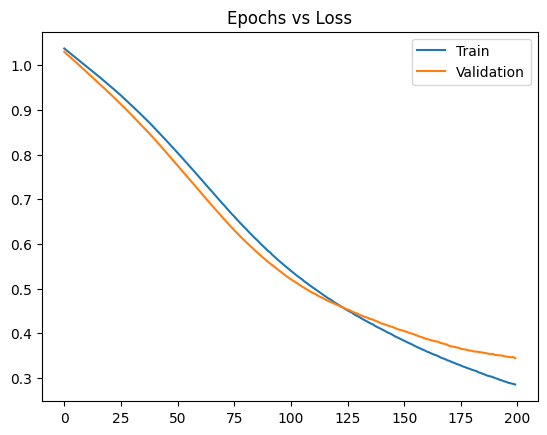

In [49]:
epochs = history.epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label="Train")
plt.plot(epochs, val_loss, label="Validation")

plt.legend()
plt.title("Epochs vs Loss")
plt.show()

**Observation**:
*   For such a low loss, we need 200 epochs

Imagine if dataset has millions of samples, it will require very high number of epochs to reach global minima. This surely will have huge drawback while deploying

`Q.` Why Mini Batch has such a large epochs? <br>
`A.` In many of the steps, optimizer tends to move in direction where it will never reach global minima. Hence due to this noisy steps. GD takes so many steps.
<br><br>
`Q.` Why do GD have noisy steps?<br>
`A.` Because between every iteration(forward and backward), no information is shared. Due to this, some batch has very low loss and some has very high loss, making gradient of weights very high and low. Thus causing noisy steps.<br><br>

`Q.` How to reduce epochs or noisy steps in GD?<br>
`A.` By taking weight average (β) of previous steps and (1-β) of current gradient, to update the direction of steps such that it moves towards global minima. This method is also known as `exponential moving average` method<br><center>
$V_t = βV_t-1 + (1-β)Δw_1$

##Gradient Descent with Momentum
<br>
Let's now train model with 50 epochs and 128 batch_size

In [55]:
model_gdm = create_baseline()
model_gdm.compile(optimizer=tf.keras.optimizers.SGD(momentum=0.9), loss=tf.keras.losses.CategoricalCrossentropy())

In [58]:
history = model_gdm.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=50, batch_size=128, verbose=0)

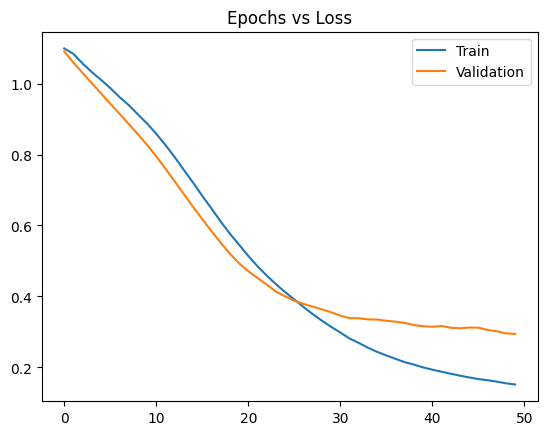

In [59]:
epochs = history.epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label="Train")
plt.plot(epochs, val_loss, label="Validation")

plt.legend()
plt.title("Epochs vs Loss")
plt.show()

**Obervation:**
Just by using gradient descent with momentum, model is able to perform much better in 25 epochs

##RMSProp

`Q.` Is there a way to further reduce training epochs for model?<br>
`A.` Yes, as we know :
- optimizer tends to move in direction (osciallations) when gradient of weight is greater than the other
- Meaning $ Δb >>> Δw $

Hence to reduce this moving direction, lets say:

On some iteration t, we calculate $V_{dw} $ by squaring the gradients as:
- $V_{dw^k} = \beta V_{dw^k} + (1-β) (dw^k)^2 $
- $V_{db^k} = \beta V_{db^k} + (1-β) (db^k)^2 $


#### How is squaring useful ?
Ans: as gradients in which the optimizer moves is higher then:
- the square of the gradient will be much high
- thus making $V_{db^k} > V_{dw^k}$

<br>

Now during weight updation:

- $w^k = w^k - α \times \frac{dw^k}{\sqrt{V_{dw^k}+ ϵ} } $; where $ϵ$ is a very small value  $ = 10^{-8}$
- $b^k = b^k - α \times \frac{db^k}{\sqrt{V_{db^k}+ ϵ} } $

<br>

Since $V_{db^k} > V_{dw^k}$,
- meaning $\frac{1}{V_{dw^k}} > \frac{1}{V_{db^k}} $

Thus making the  optimizer to move more in the direction of $dw^k$:
- hence decreasing  osciallations of the optimizer

<br>

#### Why is epilson $ϵ$ added ?
Ans: To prevent the denominator to become 0:
- When $V_{dw}$ or $V_{db}$ is 0

<br>

**Note:** This approach is known as **RMSprop**

Training the model with epoch = 50 and batch size = 128

In [63]:
model_rms = create_baseline()
model_rms.compile(optimizer=tf.keras.optimizers.RMSprop(rho=0.9),
                  loss=tf.keras.losses.CategoricalCrossentropy())


In [64]:
history = model_rms.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=50, batch_size=128, verbose=0)

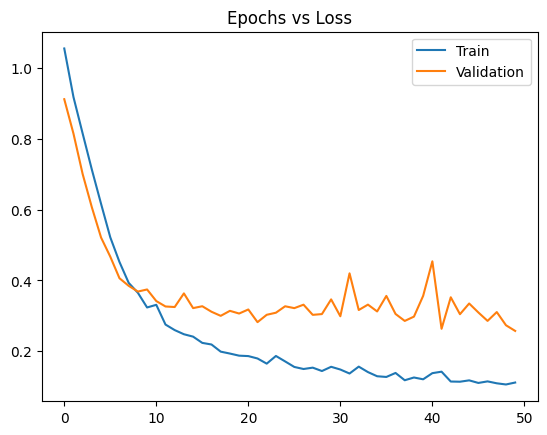

In [66]:
epochs = history.epoch
loss = history.history['loss']
val_loss = history.history["val_loss"]

plt.plot(epochs, loss, label='Train')
plt.plot(epochs, val_loss, label='Validation')

plt.legend()
plt.title("Epochs vs Loss")

plt.show()

**Observe**

Though RMSProp reaches minima within 10 training epochs:
- we see a lot of oscillations than Gradient Descent with momentum
- meaning the optimizer still takes steps in the direction not to the global minima


##Adam

#### is there a way to reduce these oscillations while still keeping the training epochs low ?

Ans: if we combine both RMSprop and momentum, this is done by an alogrithm called **Adam**

<br>

#### How does Adam work ?
Ans: Now for simplicity:
- Lets call RMSprop $V_{dw}, V_{db}$ as $S_{dw}, S_{db}$

Therefore now for some iteration t:
- We compute $dW$, $db$

then for Momentum we can say:

- $V_{dw^k} = \beta_1 V_{dw^k} + (1-\beta_1) dw^k $

Similarly,
- $V_{db^k} = \beta_1 V_{db^k} + (1-\beta_1) db^k $

<br>


After performing momentum ,RMSprop is calculated as:
- $S_{dw^k} = \beta_2 S_{dw^k} + (1-\beta_2) (dw^k)^2 $

Similarly
- $S_{db^k} = \beta_2 S_{db^k} + (1-\beta_2) (db^k)^2 $

<br>




As momentum and RMSprop both averages out,  the steps taken by Optimizer,
- then for step:$V_3$, the average out value is more influenced by $V_0, V_1, V_2$
- which makes the average value of $V_3$ biased and far away from the actual $V_3$

<br>




#### How to prevent this biasness ?
Ans: it is done by dividing $V_{dw^k}$, $V_{db^k}$ by:
- $V^{corrected}_{dw^k} = \frac{V_{dw^k}}{1-β_1^t}$

Similarly:
- $V^{corrected}_{db^k} = \frac{V_{db^k}}{1-β_1^t}$

and for RMSprop:

- $S^{corrected}_{dw^k} = \frac{S_{dw^k}}{1-β_2^t}$

Similarly:
- $S^{corrected}_{db^k} = \frac{S_{db^k}}{1-β_2^t}$

**Note:** this process is called as **Bias Correction**


<br>

Now finally, weights updation is performed:

- $w^k = w^k - α \times  \frac{1}{\sqrt{S^{corrected}_{dw}+ ϵ}} \times V^{corrected}_{dw}$

- $b^k = b^k - α \times  \frac{1}{\sqrt{S^{corrected}_{db}+ ϵ}} \times V^{corrected}_{db}$




Training the model with epoch = 50 and batch size = 128

In [74]:
model_adam = create_baseline()
model_adam.compile(optimizer=tf.keras.optimizers.Adam(beta_1=0.9, beta_2=0.999),
             loss=tf.keras.losses.CategoricalCrossentropy())

In [75]:
history = model_adam.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=128, verbose=0)

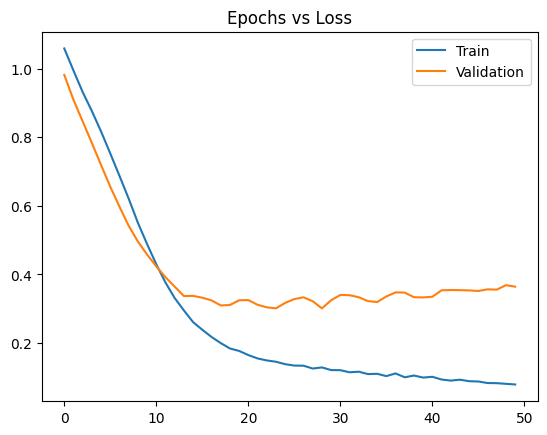

In [76]:
epochs = history.epoch
loss = history.history['loss']
val_loss = history.history["val_loss"]

plt.plot(epochs, loss, label='Train')
plt.plot(epochs, val_loss, label='Validation')

plt.legend()
plt.title("Epochs vs Loss")

plt.show()

#### Learning Rate Decay

**Observe**

How using Adam algorithm,
- the oscillations are reduced drastically
- also the model takes almost 12 epochs for it to show accruate results
- But the model performance on the validation is still high

<br>

#### Is there a way to improve model performance  ?

Ans: recall how optimizer tends on moving around the global minima:
- if the learning rate is high

#### Will a learning rate of 0.01 high for our problem ?
Ans: As using different Optimizers,
- The validation loss moves around 0.4
- it means the optimizer is stuck around the global minima


#### But what happens if learning rate is smaller ?
Ans: The number of steps increases
- And the model will require more epochs to reach global minima

<br>

#### How to make optimizer take small number of steps and still reach global minima ?

Ans: what if we keep a high learning rate intially ($\alpha_0$)
- and Learning rate decreases with each epoch($e$) by a rate $r_0$

This is called as Learning rate decay, defined as:
- for epoch in epochs:
- $\alpha = \frac{1}{1 + r_0 \times epoch } \times \alpha_0 $
- $\alpha_0 = \alpha $

<br>

#### When to implement Learning rate decay, should it be done before or after an epoch ?
Ans: After an epoch by using:
- Tensorflow callback

<br>

Lets now implement Learning Rate decay using [LearningRateScheduler](https://keras.io/api/callbacks/learning_rate_scheduler/)



In [77]:
from tensorflow.keras.callbacks import LearningRateScheduler

In [78]:
def scheduler(epochs, lr):
  r0 = 0.01
  lr = (1/(1+r0*epochs))*lr
  return lr

In [79]:
LRdecay = LearningRateScheduler(scheduler)

In [80]:
model_adam = create_baseline()
model_adam.compile(optimizer=tf.keras.optimizers.Adam(beta_1=0.9, beta_2=0.999),
                   loss=tf.keras.losses.CategoricalCrossentropy())

In [81]:
history = model_adam.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=50, batch_size=128,callbacks=[LRdecay], verbose = 0)

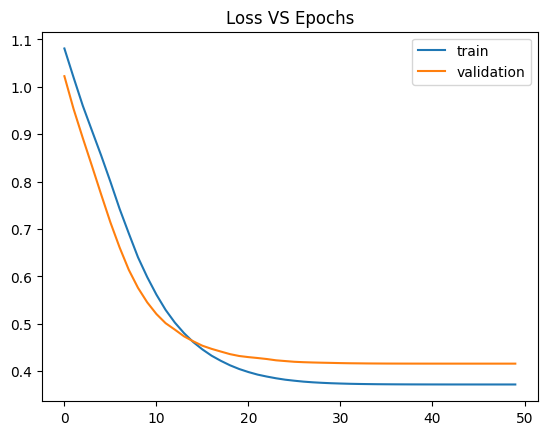

In [82]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()



**observe**

How by using Learning Rate decay,
- the model reaches a loss of around 0.4 now
- Showing that reducing the Learning Rate did help improve model performance


